In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка данных и вывод
df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [4]:
# преобразование типа данных
df['Дата'] = pd.to_datetime(df['Дата'])

In [5]:
# объем продаж
grouped_df = df.groupby('Дата').sum()['Количество']
grouped_df.head(10)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
2018-01-10    3653
2018-01-11    3176
2018-01-12    3092
2018-01-13    3294
2018-01-14    3228
Name: Количество, dtype: int64

[]

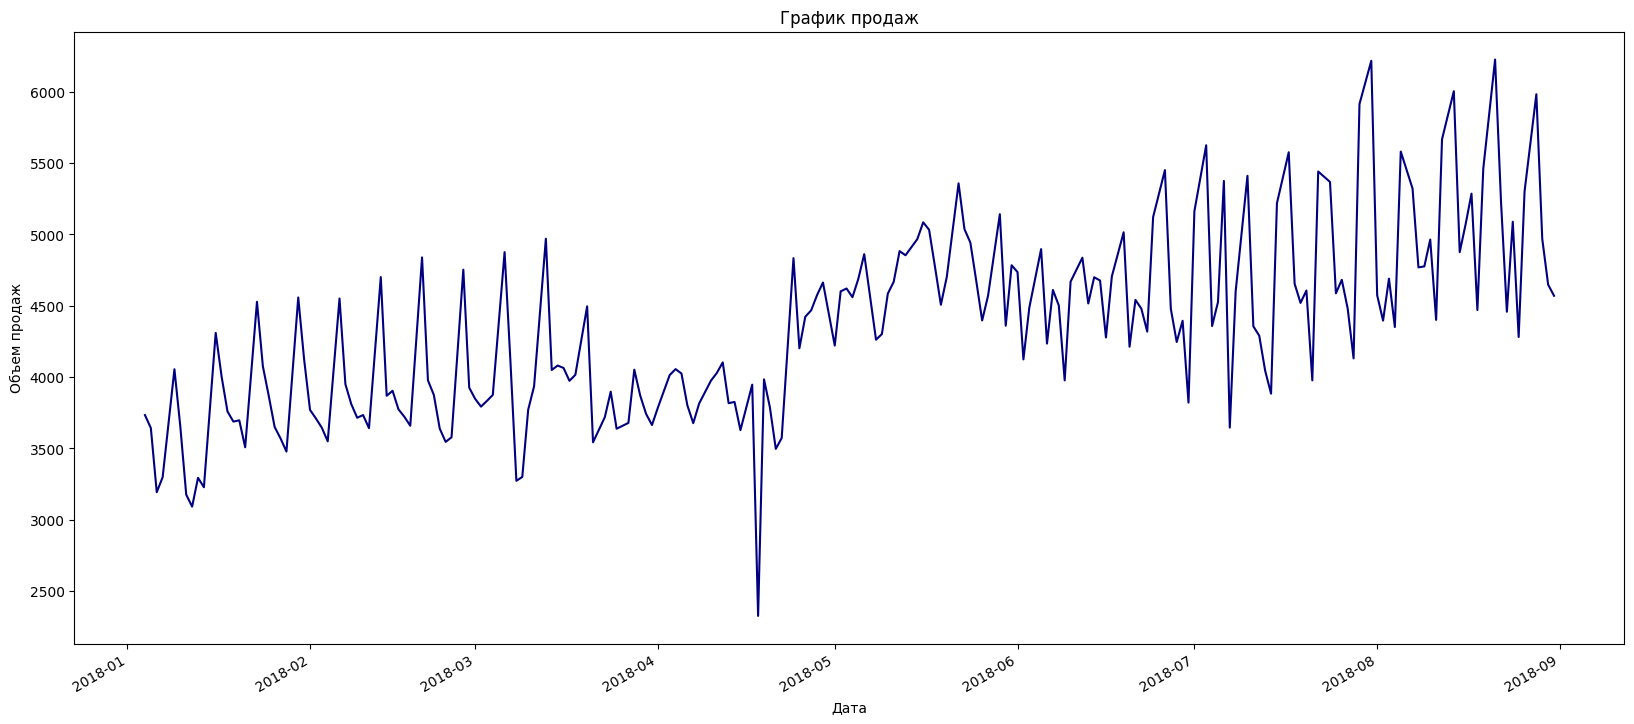

In [6]:
# визуализация
grouped_df.plot(color='navy', figsize=(20,9))
plt.xlabel('Дата')
plt.ylabel('Объем продаж')
plt.title('График продаж')
plt.plot()

- Общая картина продаж внушает уверенность в росте к концу года.
- НУЖНО АНАЛИЗИРОВАТЬ СЕЗОННОСТЬ ПРОДАЖ: Повторяющиеся резкие скачки вверх и вниз, продажи растут резкими скачками в определенные дни недели, что влияет на такой график? Вероятно клиентский поток в те дни увеличивается (может были скидки и т.д.).
- В апреле прослеживается спад, к концу месяца он очень резкий, что повлияло на это (вероятно были неблагоприятные обстоятельства). В следующем месяце, в мае продажи компенсируют апрельский спад более плотными продажами по дням недели. 
- Если брать только данный отрезок времени в 8 месяцев, и игнорировать последующие месяца можно предположить что ассортимент товаров больше интересен клиентам в летнее время. Квартальная сезонность.

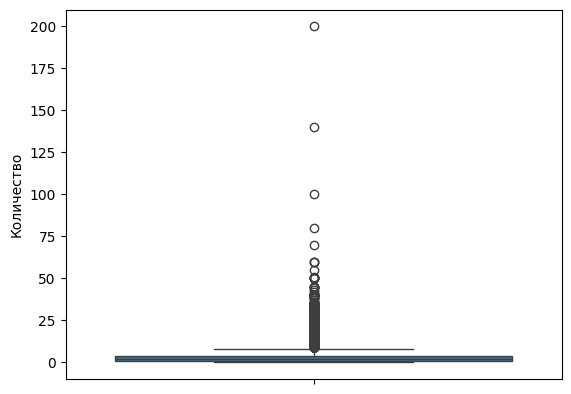

In [7]:
sns.boxplot(data=df['Количество'])
plt.show()

In [8]:
# строка с максимальным выбросам по количеству продаж
max = df['Количество'].idxmax()
print(df.iloc[max])

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


In [9]:
# разделение даты в колонки и определение дней недели
df['Год'] = df['Дата'].dt.year
df['Месяц'] = df['Дата'].dt.month
df['День'] = df['Дата'].dt.day
df['ДеньНедели'] = df['Дата'].dt.day_name(locale='Russian')

# создание фрейма для склада 3 по средам за лето
sklad3 = df[(df['Склад'] == 3) & (df['Месяц'].isin([6, 7, 8])) & (df['ДеньНедели'] == 'Среда')]
sklad3

,Дата,Склад,Контрагент,Номенклатура,Количество,Год,Месяц,День,ДеньНедели
191165,2018-06-06,3,address_206,product_0,2,2018,6,6,Среда
191166,2018-06-06,3,address_206,product_1,4,2018,6,6,Среда
191167,2018-06-06,3,address_206,product_2,4,2018,6,6,Среда
191168,2018-06-06,3,address_206,product_3,2,2018,6,6,Среда
191169,2018-06-06,3,address_206,product_4,1,2018,6,6,Среда
...,...,...,...,...,...,...,...,...,...
298028,2018-08-29,3,address_112,product_2,3,2018,8,29,Среда
298029,2018-08-29,3,address_112,product_3,3,2018,8,29,Среда
298030,2018-08-29,3,address_112,product_4,2,2018,8,29,Среда
298031,2018-08-29,3,address_112,product_5,1,2018,8,29,Среда


In [10]:
# топовый товар по продажам
top_sales = sklad3.groupby('Номенклатура').agg({'Количество':'sum'}).sort_values('Количество', ascending = False).iloc[:1].reset_index()
top_sales

,Номенклатура,Количество
0,product_1,2267


Средняя температура

In [11]:
# данные по погоде в Астане за 2018-01-01  - 2018-08-31
weather = pd.read_csv('weather.csv')

weather.head()

,Дата,Средняя температура
0,2018-08-31,8.02
1,2018-08-31,9.06
2,2018-08-31,11.03
3,2018-08-31,12.03
4,2018-08-31,13.02


In [12]:
# преобразовать тип данных Даты
weather['Дата'] = pd.to_datetime(weather['Дата'])
weather.dtypes

Дата                   datetime64[ns]
Средняя температура           float64
dtype: object

In [13]:
# объединение двух датафреймов
weather_df = pd.merge(weather, grouped_df, on='Дата', how='inner')
weather_df.sort_values('Дата', ascending=True)

,Дата,Средняя температура,Количество
1637,2018-01-04,-13.40,3734
1630,2018-01-04,-20.70,3734
1631,2018-01-04,-17.20,3734
1632,2018-01-04,-14.50,3734
1636,2018-01-04,-12.30,3734
...,...,...,...
4,2018-08-31,13.02,4570
3,2018-08-31,12.03,4570
2,2018-08-31,11.03,4570
1,2018-08-31,9.06,4570


[]

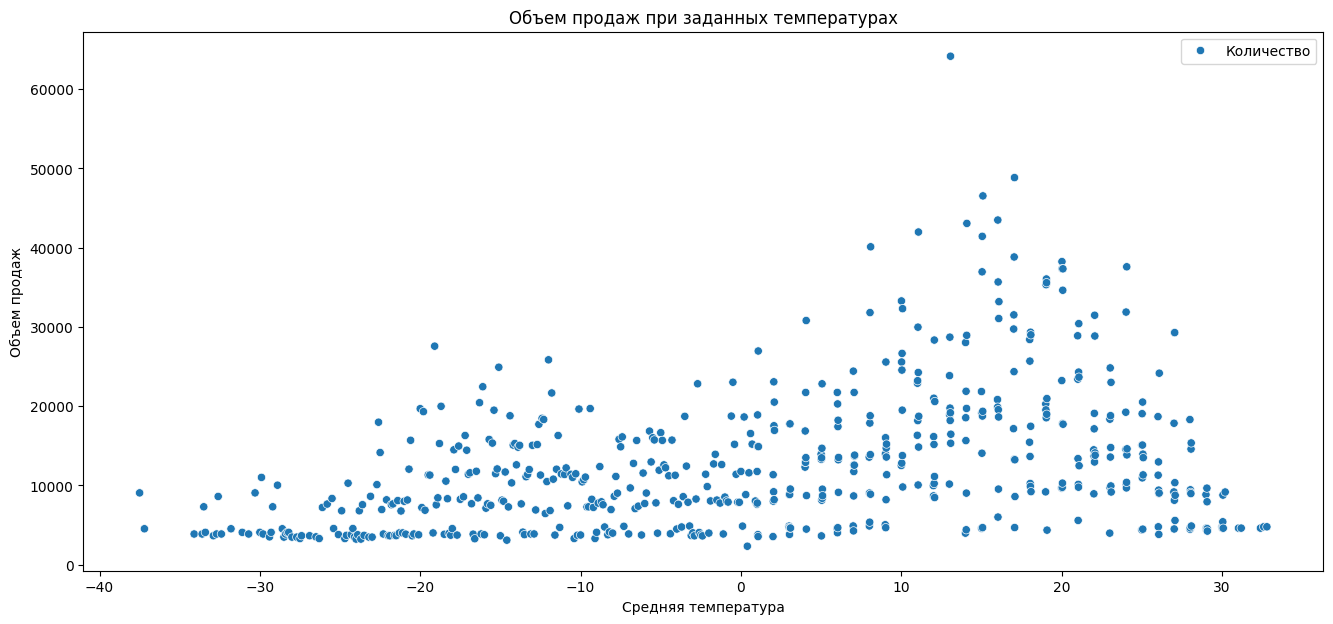

In [30]:
# Количество продаж при средних температурах
degree_sales = weather_df.groupby('Средняя температура').agg({'Количество':'sum'})
plt.figure(figsize=(16,7))
sns.scatterplot(data=degree_sales)
plt.ylabel('Объем продаж')
plt.title('Объем продаж при заданных температурах')
plt.plot()

Наибольшее количество продаж осуществляется при температуре от 10 до 20 градусов. При экстремальных минусовых и плюсовых температурах самые малые продажи.

[]

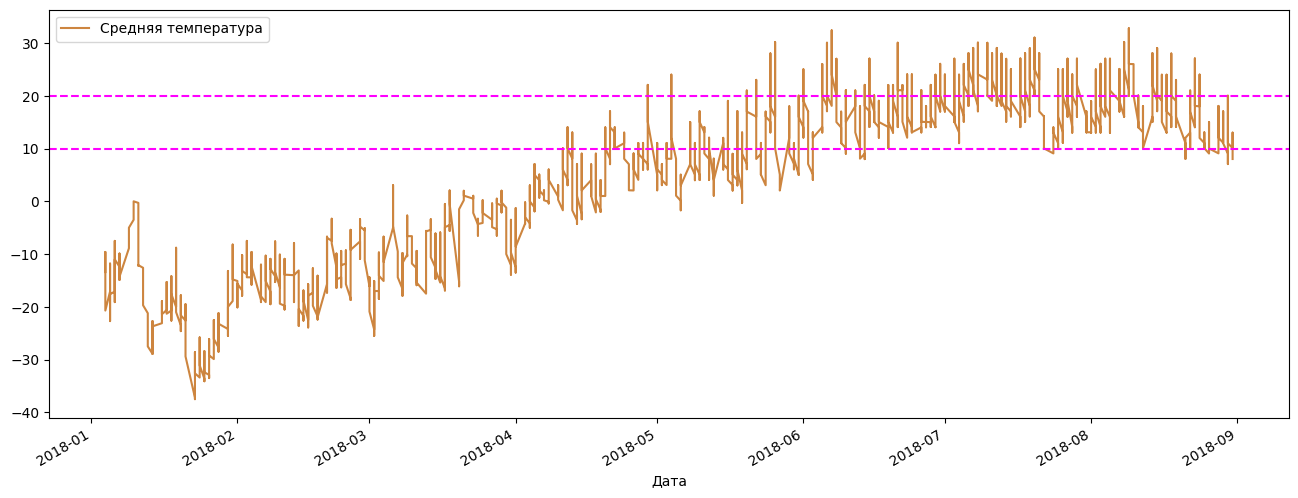

In [271]:
weather_df.plot(x='Дата', y='Средняя температура', figsize=(16,6), color='peru')
plt.axhline(10, linestyle='--', color='magenta')
plt.axhline(20, linestyle='--', color='magenta')
plt.plot()